## 회귀분석
- 회귀분석이란 하나나 그 이상의 변수들이 또 다른 변수에 미치는 영향에 대해 추론할 수 있는 통계기법이다.

### 단순회귀분석 실습 1

In [1]:
set.seed(2)

In [10]:
x=runif(10,0,11)
y=2 + 3*x + rnorm(10,0,0.2)

dfrm = data.frame(x,y)
dfrm

x,y
0.07819942,2.382386
0.16163302,2.548691
7.51743765,24.767546
10.22692244,32.623936
3.02941318,10.932904
8.93045665,28.672238
8.64466804,27.588808
10.87792371,34.453254
6.75348201,22.148634
7.81204303,25.386827


In [12]:
lm(y ~ x, data=dfrm)  # 회귀방정식 y = 2.980X + 2.068


Call:
lm(formula = y ~ x, data = dfrm)

Coefficients:
(Intercept)            x  
      2.068        2.980  


### 단순회귀분석 실습 2

- 순서 : 추정 -> 시각화 -> 평가

In [18]:
library(MASS)

In [21]:
chick_D1 <- ChickWeight[ChickWeight$Diet == 1, ]
head(chick_D1)

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


In [23]:
str(chick_D1)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	220 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


##### 선형회귀모형 추정

In [27]:
cnik_lm <- lm(weight ~ Time, data=chick_D1)
#추정된 회귀모형은 weight = 30.931 + 6.842x

##### 선형회귀모형 시각화

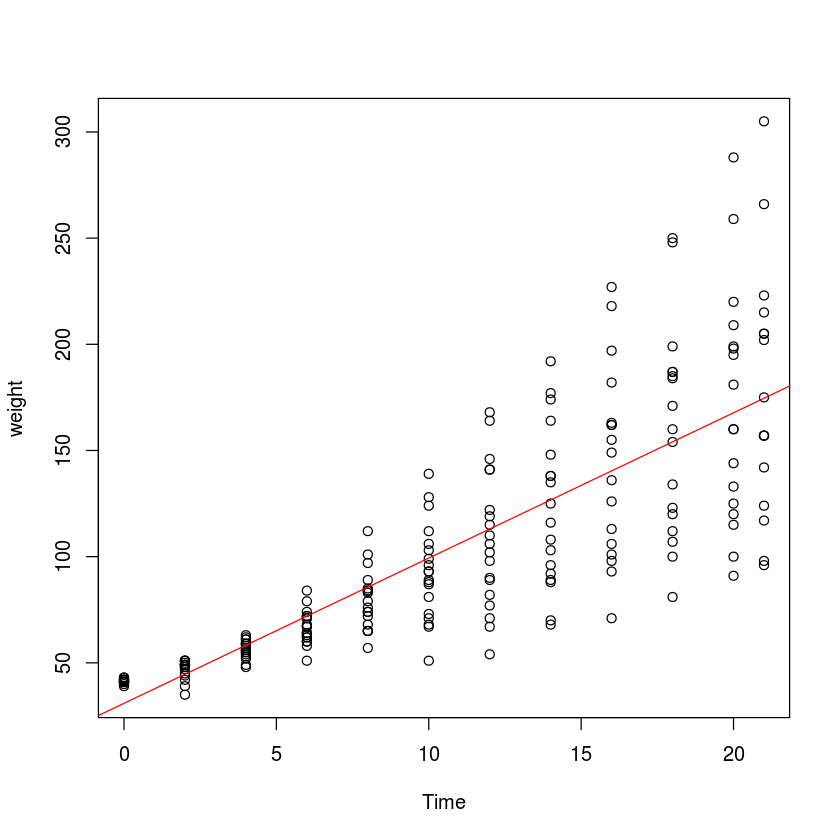

In [31]:
plot(chick_D1$Time, chick_D1$weight, xlab = 'Time', ylab='weight')
abline(cnik_lm, col=2)

##### 선형회귀모델 평가

In [26]:
summary(lm(weight ~ Time, data=chick_D1))

# F-statistic: 433.5 on 1 and 218 DF,  p-value: < 2.2e-16       -> 회귀모형이 유의하다.
# Multiple R-squared:  0.6654,	Adjusted R-squared:  0.6639     -> 데이터를 설명하는 정도가 66% 이다. 따라서, 다른 변수의 영향력을 찾아봐야 한다.

# 따라서, 회귀모형에서 weight는 Time 1증가할 때, 6.842만큼 일정하게 증가한다.
# Pr(>|t|) 부분으로 판단할 때, 상수항(Intercept)은 유의하다. (의미있다)
# Pr(>|t|) 부분으로 판단할 때, Time은 유의하다. (의미있다)


Call:
lm(formula = weight ~ Time, data = chick_D1)

Residuals:
    Min      1Q  Median      3Q     Max 
-78.609 -15.677  -0.324  11.069 130.391 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  30.9310     4.0948   7.554 1.15e-12 ***
Time          6.8418     0.3286  20.822  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.85 on 218 degrees of freedom
Multiple R-squared:  0.6654,	Adjusted R-squared:  0.6639 
F-statistic: 433.5 on 1 and 218 DF,  p-value: < 2.2e-16
